In [1]:
#Classification problem
# loosely following https://www.learnpytorch.io/02_pytorch_classification/
# with help from:
# https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py
# and Andrej Karpathy's youtube channel. 
from sklearn.datasets import make_circles
import numpy


# Make 1000 samples 
n_samples = 1000

# Create circles
X, Y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same val
print(X)
print(Y)



[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": Y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


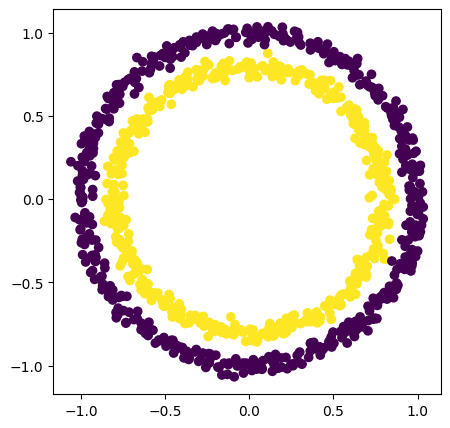

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()


In [5]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
import torch
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
import torch
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

# View the first five samples
X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [8]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

# 0.2 test; 0.8 train and subsequently split test again into validation
# and test. 
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2)



In [9]:

# split the test set into  0.5 test and 0.5 validation; i.e. 10% of 
# original data
X_val, X_test, Y_val, Y_test = train_test_split(X, 
                                                Y, 
                                                test_size=0.5, 
                                                random_state=42) 

len(X_train), len(X_test), len(Y_train), len(Y_test), len(Y_val), len(X_val)

(800, 500, 800, 500, 500, 500)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

class binary_classification_concentric_circles(nn.Module):
    def __init__(self):
        super().__init__()
        self.l0 = nn.Linear(2,10) # nn.Linear(input_nodes, output_nodes)
        #self.l1 = nn.Linear(10,10)
        self.l2 = nn.Linear(10,10) 
        self.l3 = nn.Linear(10,1) # output logit of probability of class 1. 

    def forward(self, X):
        x = self.l0(X)
        #x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.l3(x)
        return x
        #return self.l2(self.relu(self.l1(self.l0(X))))
    
classify_conc_circles = binary_classification_concentric_circles().to(device)
print(classify_conc_circles)

binary_classification_concentric_circles(
  (l0): Linear(in_features=2, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=1, bias=True)
)


In [11]:
X_train[0:5], X_train[0:5].shape

(tensor([[-0.5110, -0.6386],
         [ 0.7049,  0.3713],
         [ 0.4228, -0.7087],
         [-0.6877, -0.4527],
         [-0.8468,  0.5414]]),
 torch.Size([5, 2]))

In [12]:
classify_conc_circles.state_dict()["l0.weight"].shape

torch.Size([10, 2])

In [13]:
classify_conc_circles.l0.weight.shape

torch.Size([10, 2])

In [14]:
# manually run through network with one X input
l0_out = torch.matmul(X_train[0:5],torch.transpose(classify_conc_circles.state_dict()["l0.weight"], 0, 1) )
l0_out, X_train[0:5]

(tensor([[-0.6510, -0.3302, -0.0120, -0.0893,  0.0128, -0.3986, -0.3281, -0.1105,
          -0.3453,  0.0536],
         [ 0.5990,  0.1244, -0.0562, -0.0885,  0.2468,  0.4824,  0.4038,  0.2033,
           0.4231, -0.1658],
         [-0.1874, -0.5304, -0.1666, -0.4399,  0.6312,  0.1661,  0.1530,  0.2149,
           0.1564, -0.2673],
         [-0.6374, -0.1801,  0.0420,  0.0488, -0.1939, -0.4826, -0.4026, -0.1893,
          -0.4222,  0.1454],
         [-0.1401,  0.4920,  0.2084,  0.5164, -0.8087, -0.4488, -0.3906, -0.3428,
          -0.4050,  0.3771]]),
 tensor([[-0.5110, -0.6386],
         [ 0.7049,  0.3713],
         [ 0.4228, -0.7087],
         [-0.6877, -0.4527],
         [-0.8468,  0.5414]]))

In [15]:
# start again. Access the weights/biases directly, not through state_dict

In [16]:
# multiply weights: this should give the same as the above cell
l0_out = torch.matmul(X_train[0:100],torch.transpose(classify_conc_circles.l0.weight, 0, 1) )
l0_out[0:15]

tensor([[-0.6510, -0.3302, -0.0120, -0.0893,  0.0128, -0.3986, -0.3281, -0.1105,
         -0.3453,  0.0536],
        [ 0.5990,  0.1244, -0.0562, -0.0885,  0.2468,  0.4824,  0.4038,  0.2033,
          0.4231, -0.1658],
        [-0.1874, -0.5304, -0.1666, -0.4399,  0.6312,  0.1661,  0.1530,  0.2149,
          0.1564, -0.2673],
        [-0.6374, -0.1801,  0.0420,  0.0488, -0.1939, -0.4826, -0.4026, -0.1893,
         -0.4222,  0.1454],
        [-0.1401,  0.4920,  0.2084,  0.5164, -0.8087, -0.4488, -0.3906, -0.3428,
         -0.4050,  0.3771],
        [ 0.2965, -0.3797, -0.1933, -0.4636,  0.7583,  0.5234,  0.4507,  0.3507,
          0.4687, -0.3687],
        [ 0.4859,  0.5291,  0.1149,  0.3356, -0.4170,  0.1151,  0.0842, -0.0778,
          0.0916,  0.1436],
        [-0.4240,  0.1291,  0.1212,  0.2692, -0.4876, -0.4815, -0.4092, -0.2669,
         -0.4270,  0.2583],
        [ 0.1318, -0.5007, -0.2103, -0.5219,  0.8155,  0.4468,  0.3890,  0.3440,
          0.4034, -0.3794],
        [-0.2018,  

shape:  torch.Size([100, 10])
first 10 values:  tensor([[-0.6510, -0.3302, -0.0120, -0.0893,  0.0128, -0.3986, -0.3281, -0.1105,
         -0.3453,  0.0536],
        [ 0.5990,  0.1244, -0.0562, -0.0885,  0.2468,  0.4824,  0.4038,  0.2033,
          0.4231, -0.1658],
        [-0.1874, -0.5304, -0.1666, -0.4399,  0.6312,  0.1661,  0.1530,  0.2149,
          0.1564, -0.2673],
        [-0.6374, -0.1801,  0.0420,  0.0488, -0.1939, -0.4826, -0.4026, -0.1893,
         -0.4222,  0.1454],
        [-0.1401,  0.4920,  0.2084,  0.5164, -0.8087, -0.4488, -0.3906, -0.3428,
         -0.4050,  0.3771],
        [ 0.2965, -0.3797, -0.1933, -0.4636,  0.7583,  0.5234,  0.4507,  0.3507,
          0.4687, -0.3687],
        [ 0.4859,  0.5291,  0.1149,  0.3356, -0.4170,  0.1151,  0.0842, -0.0778,
          0.0916,  0.1436],
        [-0.4240,  0.1291,  0.1212,  0.2692, -0.4876, -0.4815, -0.4092, -0.2669,
         -0.4270,  0.2583],
        [ 0.1318, -0.5007, -0.2103, -0.5219,  0.8155,  0.4468,  0.3890,  0.3440,

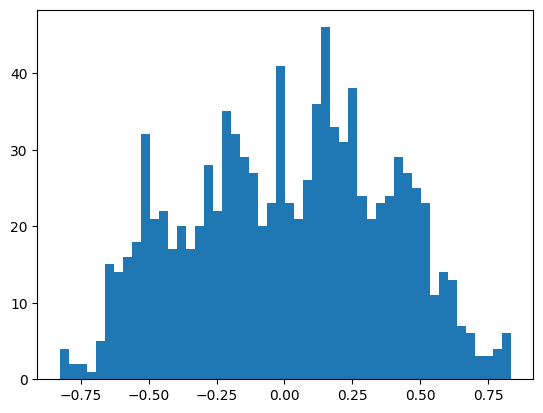

In [17]:

print("shape: ", l0_out.shape)
print("first 10 values: ", l0_out[0:10])
plt.hist(l0_out.view(-1).tolist(),50);

tensor([[-0.9768, -0.4131, -0.2992,  0.3798, -0.5454, -0.7246, -0.5278, -0.5356,
         -0.2785, -0.6448],
        [ 0.2732,  0.0415, -0.3434,  0.3806, -0.3114,  0.1564,  0.2042, -0.2219,
          0.4898, -0.8642],
        [-0.5132, -0.6133, -0.4538,  0.0292,  0.0730, -0.1599, -0.0467, -0.2102,
          0.2231, -0.9657],
        [-0.9632, -0.2630, -0.2452,  0.5178, -0.7520, -0.8086, -0.6023, -0.6144,
         -0.3554, -0.5530],
        [-0.4658,  0.4090, -0.0787,  0.9854, -1.3669, -0.7748, -0.5902, -0.7679,
         -0.3383, -0.3213],
        [-0.0293, -0.4627, -0.4805,  0.0055,  0.2001,  0.1974,  0.2510, -0.0745,
          0.5354, -1.0670],
        [ 0.1601,  0.4462, -0.1723,  0.8047, -0.9752, -0.2108, -0.1155, -0.5029,
          0.1583, -0.5548],
        [-0.7498,  0.0462, -0.1660,  0.7383, -1.0458, -0.8075, -0.6089, -0.6921,
         -0.3603, -0.4401],
        [-0.1939, -0.5837, -0.4975, -0.0528,  0.2574,  0.1208,  0.1894, -0.0812,
          0.4701, -1.0778],
        [-0.5276,  

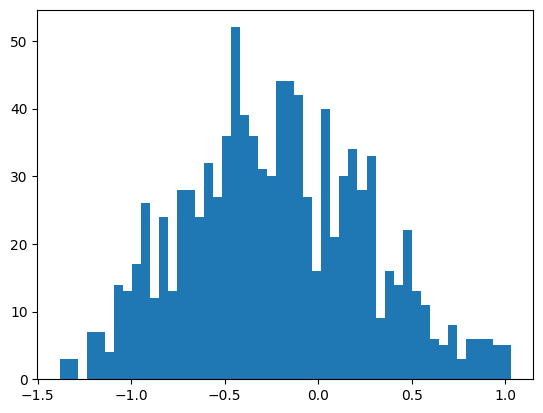

In [18]:
# add bias l0
l0_out = l0_out + classify_conc_circles.l0.bias
plt.hist(l0_out.view(-1).tolist(),50);
l0_out[0:15]

(tensor([[0.0000, 0.0000, 0.0000, 0.3798, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.2732, 0.0415, 0.0000, 0.3806, 0.0000, 0.1564, 0.2042, 0.0000, 0.4898,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0292, 0.0730, 0.0000, 0.0000, 0.0000, 0.2231,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.5178, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.4090, 0.0000, 0.9854, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0055, 0.2001, 0.1974, 0.2510, 0.0000, 0.5354,
          0.0000],
         [0.1601, 0.4462, 0.0000, 0.8047, 0.0000, 0.0000, 0.0000, 0.0000, 0.1583,
          0.0000],
         [0.0000, 0.0462, 0.0000, 0.7383, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.2574, 0.1208, 0.1894, 0.0000, 0.4701,
          0.0000],
         [0.0000, 0.2172, 0.0000, 0.8242, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         

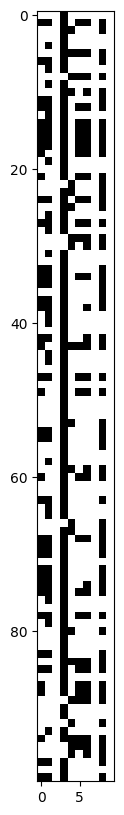

In [19]:
# relu l0
l0_relu = F.relu(l0_out)
# initialisations look heavily weighted to 0, which 
# is possibly going to give us lots of dead Relus!
plt.figure(figsize = (20, 10))
plt.imshow(l0_relu.abs() <= 0 , cmap='gray') # Booleanfrom conditional
l0_relu[0:15], l0_relu.shape, classify_conc_circles.l2.weight.shape

In [20]:
print("classify_conc_circles.l2.bias",  classify_conc_circles.l2.bias)

classify_conc_circles.l2.bias Parameter containing:
tensor([ 0.2721,  0.0985, -0.2678,  0.2188, -0.0870, -0.1212, -0.2625, -0.3144,
         0.0905, -0.0691], requires_grad=True)


tensor([[ 0.2921,  0.2058, -0.1692,  0.1775, -0.1861, -0.1698, -0.1808, -0.4016,
         -0.0215, -0.1505],
        [ 0.4166,  0.3199, -0.0975,  0.1247, -0.1309, -0.2764, -0.1880, -0.6721,
         -0.0060, -0.0764],
        [ 0.2738,  0.1560, -0.1983,  0.1807, -0.0923, -0.1465, -0.2980, -0.3823,
          0.0363, -0.0320],
        [ 0.2993,  0.2447, -0.1334,  0.1624, -0.2222, -0.1874, -0.1512, -0.4332,
         -0.0623, -0.1800],
        [ 0.2141,  0.3417, -0.0621,  0.0232, -0.3011, -0.3354, -0.0836, -0.5083,
         -0.1757, -0.3284],
        [ 0.3213,  0.2412, -0.0647,  0.1895, -0.1928, -0.1384, -0.3279, -0.5723,
         -0.0340, -0.0353],
        [ 0.2458,  0.3265, -0.1244,  0.0082, -0.1865, -0.3717, -0.1325, -0.5367,
         -0.0912, -0.2519],
        [ 0.2985,  0.3030, -0.0819,  0.1285, -0.2748, -0.2255, -0.1075, -0.4802,
         -0.1245, -0.2327],
        [ 0.2948,  0.2389, -0.0932,  0.1968, -0.1847, -0.1217, -0.3398, -0.5195,
         -0.0304, -0.0431],
        [ 0.2571,  

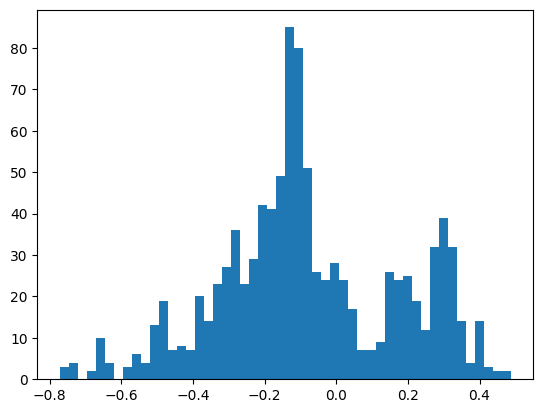

In [21]:
# multiply, add bias for l2 - l1 has been commented out of the model
l2_out = torch.matmul(l0_relu, \
                      torch.transpose(classify_conc_circles.l2.weight, 0, 1) )
l2_out = l2_out + classify_conc_circles.l2.bias
l0_out = l0_out + classify_conc_circles.l0.bias
plt.hist(l2_out.view(-1).tolist(),50);
l2_out[0:15]

(tensor([[0.2921, 0.2058, 0.0000, 0.1775, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.4166, 0.3199, 0.0000, 0.1247, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.2738, 0.1560, 0.0000, 0.1807, 0.0000, 0.0000, 0.0000, 0.0000, 0.0363,
          0.0000],
         [0.2993, 0.2447, 0.0000, 0.1624, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.2141, 0.3417, 0.0000, 0.0232, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.3213, 0.2412, 0.0000, 0.1895, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.2458, 0.3265, 0.0000, 0.0082, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.2985, 0.3030, 0.0000, 0.1285, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.2948, 0.2389, 0.0000, 0.1968, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.2571, 0.3126, 0.0000, 0.0822, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         

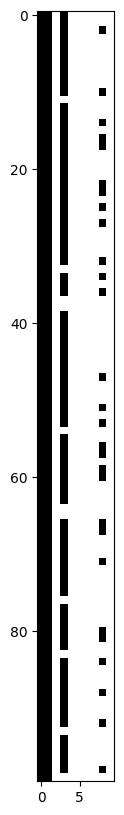

In [22]:
#relu l2
l2_relu = F.relu(l2_out)
# initialisations look heavily weighted to 0, which 
# is possibly going to give us lots of dead Relus!
plt.figure(figsize = (20, 10))
plt.imshow(l2_relu.abs() <= 0 , cmap='gray') # Booleanfrom conditional
l2_relu[0:15], l2_relu.shape, classify_conc_circles.l3.weight.shape

In [23]:
# multiply l3
l3_out = torch.matmul(l2_relu,\
                      torch.transpose(classify_conc_circles.l3.weight, 0 ,1))
l3_out[0:15]

tensor([[-0.0586],
        [-0.0607],
        [-0.0382],
        [-0.0644],
        [-0.0677],
        [-0.0670],
        [-0.0564],
        [-0.0717],
        [-0.0714],
        [-0.0686],
        [-0.0461],
        [-0.0620],
        [-0.0616],
        [-0.0727],
        [-0.0510]], grad_fn=<SliceBackward0>)

In [24]:
# add bias l3
l3_out = l3_out + classify_conc_circles.l3.bias
l3_out[0:15]

tensor([[0.0209],
        [0.0189],
        [0.0413],
        [0.0152],
        [0.0119],
        [0.0126],
        [0.0232],
        [0.0079],
        [0.0082],
        [0.0110],
        [0.0335],
        [0.0176],
        [0.0180],
        [0.0069],
        [0.0286]], grad_fn=<SliceBackward0>)

In [25]:
# cross check result
Y_logits = classify_conc_circles(X_train[0:100])
Y_logits[0:15]

tensor([[0.0209],
        [0.0189],
        [0.0413],
        [0.0152],
        [0.0119],
        [0.0126],
        [0.0232],
        [0.0079],
        [0.0082],
        [0.0110],
        [0.0335],
        [0.0176],
        [0.0180],
        [0.0069],
        [0.0286]], grad_fn=<SliceBackward0>)

In [26]:
# check initialisations 
classify_conc_circles.state_dict()

OrderedDict([('l0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('l0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('l2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -

In [27]:
classify_conc_circles.state_dict()["l2.weight"]

tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
          0.0346, -0.0997],
        [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
          0.1606, -0.1927],
        [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
          0.2475, -0.2247],
        [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
         -0.1886, -0.1886],
        [ 0.2844,  0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,
          0.1132,  0.2628],
        [-0.1633, -0.2156,  0.1678, -0.1278,  0.1919, -0.0750,  0.1809, -0.2457,
         -0.1596,  0.0964],
        [ 0.0669, -0.0806,  0.1885,  0.2150, -0.2293, -0.1688,  0.2896, -0.1067,
         -0.1121, -0.3060],
        [-0.1811,  0.0790, -0.0417, -0.2295,  0.0074, -0.2160, -0.2683, -0.1741,
         -0.2768, -0.2014],
        [ 0.3161,  0.0597,  0.0974, -0.2949, -0.2077, -0.1053,  0.0494, -0.2783,
         -0.1363, -0.1893],
        [ 0.0009, -

In [28]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([500, 2]),
 torch.Size([500]))

In [29]:
X_train[:10, :], Y_train[:10], X_test[:10, :], Y_test[:10]

(tensor([[-0.5110, -0.6386],
         [ 0.7049,  0.3713],
         [ 0.4228, -0.7087],
         [-0.6877, -0.4527],
         [-0.8468,  0.5414],
         [ 0.9266, -0.3483],
         [ 0.0113,  0.8175],
         [-0.7832, -0.0010],
         [ 0.8464, -0.5550],
         [-0.6851,  0.2873]]),
 tensor([1., 1., 1., 1., 0., 0., 1., 1., 0., 1.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [30]:
# Calculate accuracy (a classification metric)
# (number correct predictions)/(total number of preictions)
def calculate_accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc

In [31]:
# Training


# BCEWithLogitsLoss, below, incorporates a sigmoid layer and then binary cross 
# entropy 
# loss function, which is supposed to be a more numerically stable implementation
# than sigmoid layer and then BCE. 
calculate_loss = torch.nn.modules.loss.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(params=classify_conc_circles.parameters(), 
                            lr=0.1)

# Put all data on target device
X_train,_train = X_train.to(device), Y_train.to(device)
X_val, Y_val = X_val.to(device), Y_val.to(device)

# lists to store progress
epochs = 3000
train_loss_values = []
validation_loss_values = []
epoch_count = []

for epoch in range(epochs):
  #forward through network, but not final prediction. 
  Y_logits = classify_conc_circles(X_train).squeeze() 
  # apply the missing sigmoid layer to turn logits 
  # into "probabilities" and round up or down to 1 or 0 to get 
  # predicted lable. I.e. >= 0.5 prediction is 1, otherwise 0
  Y_pred_train = torch.round(torch.sigmoid(Y_logits)) 

  # 2. Calculate loss and accuracy
   # BCEWithLogitsLoss calculates loss using logits
  loss = calculate_loss(Y_logits, Y_train)
  accuracy = calculate_accuracy(Y_train, 
                                Y_pred_train)
  
  train_loss_values.append(loss.detach().item())
  epoch_count.append(epoch)

   ### validation set metrics prior to back prop.
  classify_conc_circles.eval()
  with torch.inference_mode():
    # 1. Forward pass
    logits = classify_conc_circles(X_val).squeeze() 
    Y_pred_val = torch.round(torch.sigmoid(logits))
    # 2. Caculate loss/accuracy
    validation_loss = calculate_loss(logits,
                        Y_pred_val)
    validation_acc = calculate_accuracy(Y_val,
                            Y_pred_val)

    validation_loss_values.append(validation_loss)
    # Print out what's happening every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}%\
         | Validation loss: {validation_loss:.5f},\
          Test acc: {validation_acc:.2f}%")
    
  # 3. back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # 5. Final loss
classify_conc_circles.eval()
with torch.inference_mode():
  # 5.1. Forward pass validation
  validation_logits = classify_conc_circles(X_val).squeeze() 
  validation_pred = torch.round(torch.sigmoid(logits))
  # 5.2. Calculate test loss and accuracy
  validation_loss_values.append(validation_loss)
  validation_acc = calculate_accuracy(Y_val,
                            Y_pred_val)
  # 5.3. Forward pass with training data
  Y_logits = classify_conc_circles(X_train).squeeze()
  Y_pred_train = torch.round(torch.sigmoid(Y_logits))
  loss = calculate_loss(Y_logits, Y_train)
  accuracy = calculate_accuracy(Y_train, 
                                Y_pred_train)
  train_loss_values.append(loss.detach().item())
  epoch_count.append(epoch)

print(f"Final model losses/accuracies. | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}%\
         | Validation loss: {validation_loss:.5f},\
          Test acc: {validation_acc:.2f}%")
    


Epoch: 0 | Loss: 0.69262, Accuracy: 51.25%         | Validation loss: 0.68214,          Test acc: 50.00%
Epoch: 50 | Loss: 0.69118, Accuracy: 51.25%         | Validation loss: 0.67299,          Test acc: 50.00%
Epoch: 100 | Loss: 0.69027, Accuracy: 51.25%         | Validation loss: 0.67243,          Test acc: 50.00%
Epoch: 150 | Loss: 0.68928, Accuracy: 53.00%         | Validation loss: 0.67315,          Test acc: 51.40%
Epoch: 200 | Loss: 0.68812, Accuracy: 70.00%         | Validation loss: 0.67219,          Test acc: 67.80%
Epoch: 250 | Loss: 0.68671, Accuracy: 68.75%         | Validation loss: 0.66860,          Test acc: 67.00%
Epoch: 300 | Loss: 0.68502, Accuracy: 66.38%         | Validation loss: 0.66305,          Test acc: 65.00%
Epoch: 350 | Loss: 0.68293, Accuracy: 62.75%         | Validation loss: 0.65617,          Test acc: 62.60%
Epoch: 400 | Loss: 0.68042, Accuracy: 61.50%         | Validation loss: 0.64808,          Test acc: 61.60%
Epoch: 450 | Loss: 0.67748, Accuracy: 60

'    \n  # 3. back propagation\n  optimizer.zero_grad()\n  loss.backward()\n  optimizer.step()\n\n  ### validation set metrics\n  classify_conc_circles.eval()\n  with torch.inference_mode():\n    # 1. Forward pass\n    logits = classify_conc_circles(X_val).squeeze() \n    Y_pred_val = torch.round(torch.sigmoid(logits))\n    # 2. Caculate loss/accuracy\n    validation_loss = calculate_loss(logits,\n                        Y_pred_val)\n    validation_acc = calculate_accuracy(Y_val,\n                            Y_pred_val)\n\n    validation_loss_values.append(validation_loss)\n    # Print out what\'s happening every 50 epochs\n    if epoch % 50 == 0:\n        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Validation loss: {validation_loss:.5f}, Test acc: {validation_acc:.2f}%")\n'

In [32]:
epoch_count[:10], len(epoch_count)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 3001)

In [33]:
train_loss_values[:10], len(train_loss_values)

([0.692615270614624,
  0.6925544738769531,
  0.6924909949302673,
  0.6924272179603577,
  0.6923620104789734,
  0.6922978758811951,
  0.6922378540039062,
  0.6921846270561218,
  0.6921356916427612,
  0.692089319229126],
 3001)

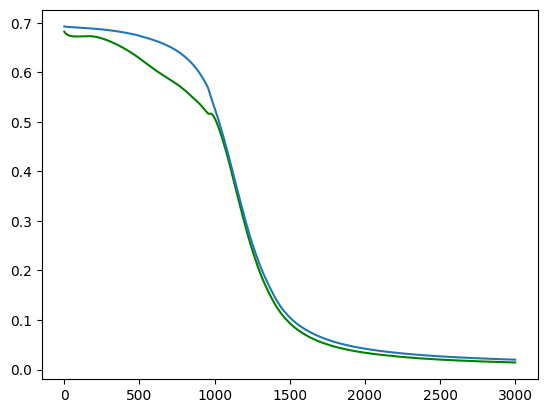

In [34]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, validation_loss_values, c="g")
plt.plot(epoch_count, train_loss_values)

In [35]:
# make a grid of input data to feed to the network.
# the output will form the basis of the contour plot.
# our circle data has range -1 to +1 along the axes
import numpy as np
#xx, yy = np.mgrid[-1.0:1.0:.01, -1.0:1.0:.01]
# Generate a grid of points over the input space
x_min, x_max = -2, 2
y_min, y_max = -2, 2
step = 0.05
xx, yy = \
       np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid = np.c_[xx.ravel(), yy.ravel()]



In [36]:
  classify_conc_circles.eval()
  with torch.inference_mode():
    # 1. Forward pass
    #X_test = torch.FloatTensor(grid).to(device)
    X_for_contours = torch.tensor(grid).type('torch.FloatTensor').to(device)
    logits = classify_conc_circles(X_for_contours)

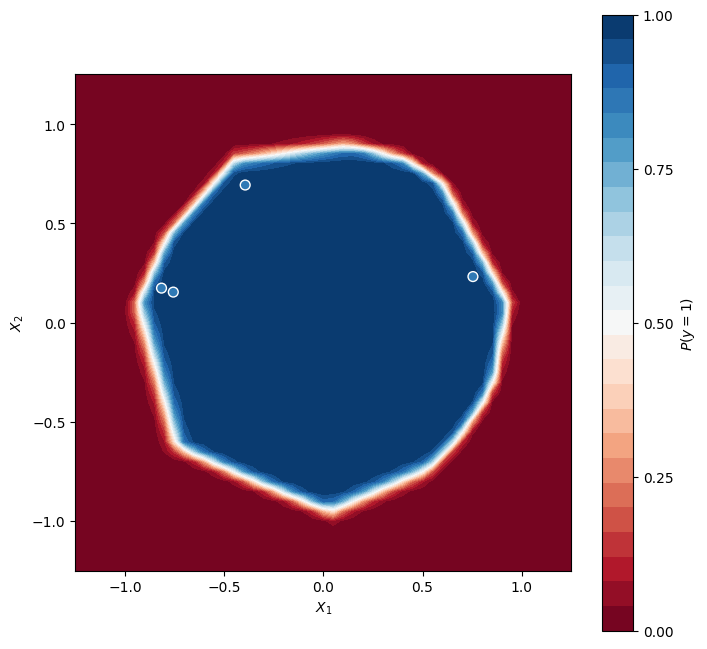

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929]]) tensor([1., 1., 1., 1.])


In [37]:

probs = torch.sigmoid(logits).to(device).numpy()
Z = probs.reshape(xx.shape)

'''
# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar()
plt.show()
'''


f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, Z, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:4,0], X[:4, 1], c=Y[:4], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",\
       xlim=(-1.25, 1.25), ylim=(-1.25, 1.25),\
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()

# double check which data labelled 1 and which labelled 0 
print(X[:4,:], Y[:4])

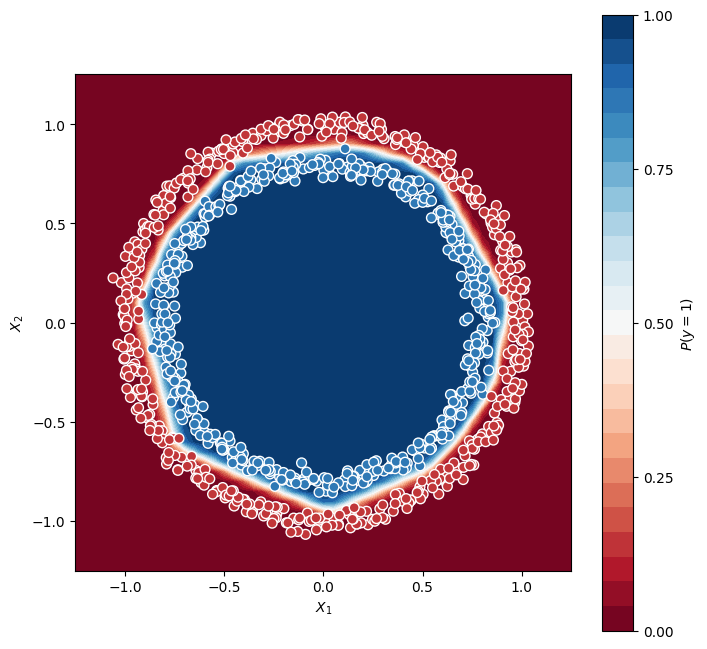

In [38]:
f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, Z, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",\
       xlim=(-1.25, 1.25), ylim=(-1.25, 1.25),\
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()
